In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv(r'C:\Users\Utkarsh Bachhav\Downloads\OneDrive\Desktop\Python_ML\Week_9\Day_2_(Pt - 30)\loan_approval_data.csv')
df

,Applicant_ID,Applicant_Income,Coapplicant_Income,Employment_Status,Age,Marital_Status,Dependents,Credit_Score,Existing_Loans,DTI_Ratio,Savings,Collateral_Value,Loan_Amount,Loan_Term,Loan_Purpose,Property_Area,Education_Level,Gender,Employer_Category,Loan_Approved
0,1.0,17795.0,1387.0,Salaried,51.0,Married,0.0,637.0,4.0,0.53,19403.0,45638.0,16619.0,84.0,Personal,Urban,Not Graduate,Female,Private,No
1,2.0,2860.0,2679.0,Salaried,46.0,Married,3.0,621.0,2.0,0.30,2580.0,49272.0,38687.0,NaN,Car,Semiurban,Graduate,NaN,Private,No
2,3.0,7390.0,2106.0,Salaried,25.0,Single,2.0,674.0,4.0,0.20,13844.0,6908.0,27943.0,72.0,NaN,Urban,NaN,Female,Government,Yes
3,4.0,13964.0,8173.0,Salaried,40.0,Married,2.0,579.0,3.0,0.31,9553.0,10844.0,27819.0,60.0,Business,Rural,Graduate,Female,Government,No
4,5.0,13284.0,4223.0,Self-employed,31.0,Single,2.0,721.0,1.0,0.29,9386.0,37629.0,12741.0,72.0,Car,NaN,Graduate,Male,Private,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996.0,NaN,9092.0,Salaried,58.0,Married,0.0,557.0,0.0,0.59,5370.0,43563.0,8311.0,72.0,Personal,NaN,Not Graduate,Male,Unemployed,No
996,997.0,3279.0,6356.0,Self-employed,58.0,Married,1.0,646.0,3.0,0.19,NaN,18361.0,22563.0,12.0,Business,Urban,Graduate,Female,Government,No
997,998.0,15192.0,8433.0,Contract,48.0,Single,1.0,666.0,1.0,0.40,8581.0,41335.0,16203.0,24.0,Home,Rural,Graduate,Male,MNC,No
998,999.0,9083.0,7380.0,Unemployed,50.0,Single,1.0,748.0,3.0,0.31,13491.0,8933.0,10290.0,36.0,Personal,Urban,Graduate,Male,Private,Yes


In [3]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Applicant_ID        950 non-null    float64
 1   Applicant_Income    950 non-null    float64
 2   Coapplicant_Income  950 non-null    float64
 3   Employment_Status   950 non-null    object 
 4   Age                 950 non-null    float64
 5   Marital_Status      950 non-null    object 
 6   Dependents          950 non-null    float64
 7   Credit_Score        950 non-null    float64
 8   Existing_Loans      950 non-null    float64
 9   DTI_Ratio           950 non-null    float64
 10  Savings             950 non-null    float64
 11  Collateral_Value    950 non-null    float64
 12  Loan_Amount         950 non-null    float64
 13  Loan_Term           950 non-null    float64
 14  Loan_Purpose        950 non-null    object 
 15  Property_Area       950 non-null    object 
 16  Educati

## Handling Missing Values


In [4]:
# Divide columns into category and numrical 

categorical_cols = df.select_dtypes(include=['object']).columns
numerical_cols = df.select_dtypes(include=['number']).columns

In [5]:
from sklearn.impute import SimpleImputer

# 
num_inp = SimpleImputer(strategy='mean')
df[numerical_cols] = num_inp.fit_transform(df[numerical_cols])

cat_imp = SimpleImputer(strategy='most_frequent')
df[categorical_cols] = cat_imp.fit_transform(df[categorical_cols]) 

## EDA - Exploratory Data Analysis 

Text(0.5, 1.0, 'Is Loan Approved or not?')

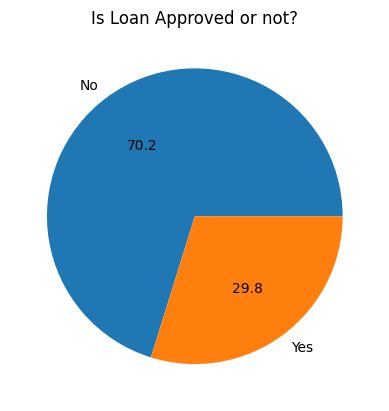

In [6]:
classes_count = df['Loan_Approved'].value_counts() 
plt.pie(classes_count, labels=['No', 'Yes'], autopct="%1.1f")
plt.title('Is Loan Approved or not?')

[Text(0, 0, '621'), Text(0, 0, '379')]

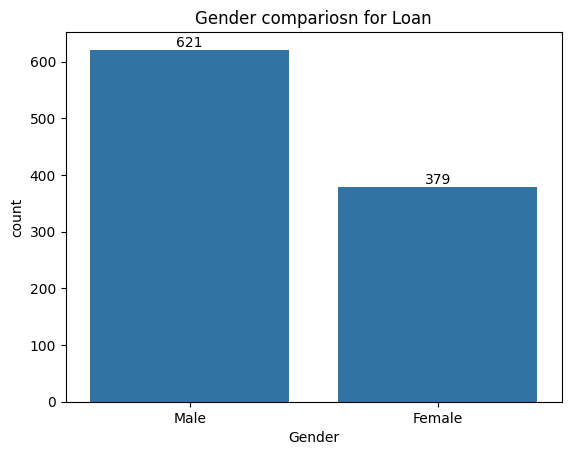

In [7]:
# Analyze category 
Gender_count = df['Gender'].value_counts() 
ax = sns.barplot(Gender_count)
plt.title("Gender compariosn for Loan")
ax.bar_label(ax.containers[0])

[Text(0, 0, '722'), Text(0, 0, '278')]

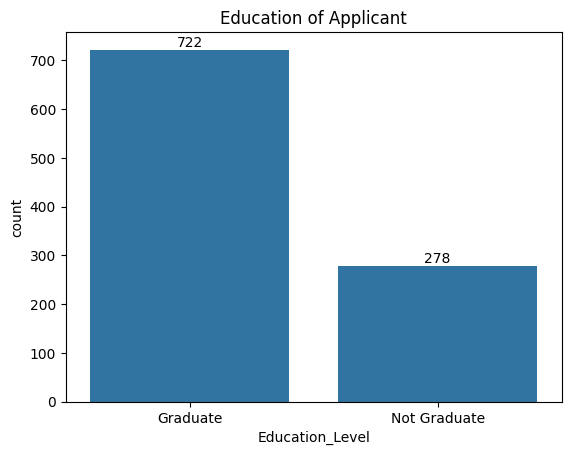

In [8]:
# Education 
Education_count = df['Education_Level'].value_counts() 
a = sns.barplot(Education_count)
plt.title("Education of Applicant")
a.bar_label(a.containers[0])

<Axes: xlabel='Applicant_Income', ylabel='Count'>

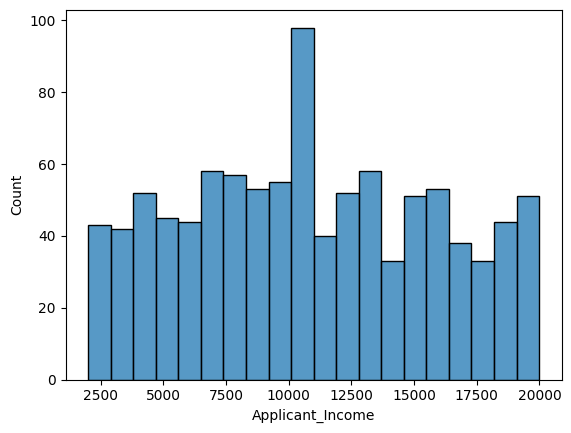

In [9]:
# Analyze Applicant income 
sns.histplot(
    data = df, 
    x = 'Applicant_Income', 
    bins = 20
)

<Axes: xlabel='Coapplicant_Income', ylabel='Count'>

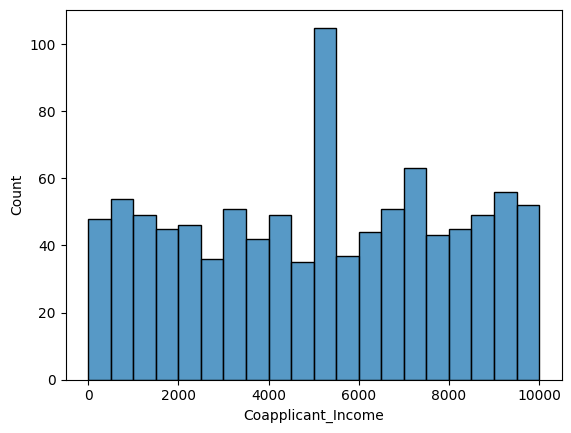

In [10]:
# Analyze coaplicant income 
sns.histplot(
    data = df, 
    x = 'Coapplicant_Income', 
    bins = 20
)

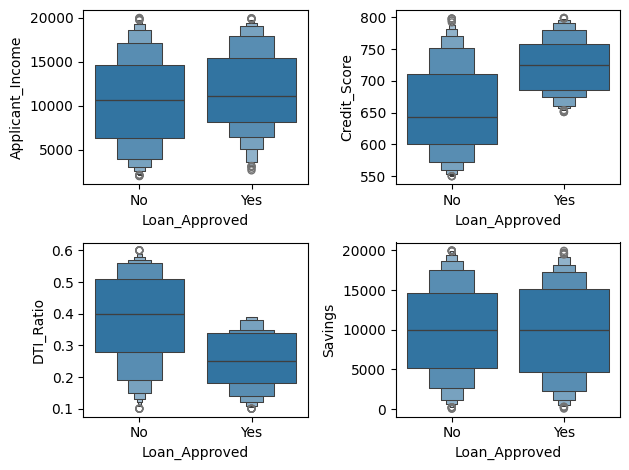

In [11]:
fig, axes = plt.subplots(2, 2) 

sns.boxenplot(ax = axes[0, 0], data = df, x = 'Loan_Approved', y = 'Applicant_Income') 
sns.boxenplot(ax = axes[0, 1], data = df, x = 'Loan_Approved', y = 'Credit_Score')  
sns.boxenplot(ax = axes[1, 0], data = df, x = 'Loan_Approved', y = 'DTI_Ratio')  
sns.boxenplot(ax = axes[1, 1], data = df, x = 'Loan_Approved', y = 'Savings') 

plt.tight_layout() 

<Axes: xlabel='Credit_Score', ylabel='Count'>

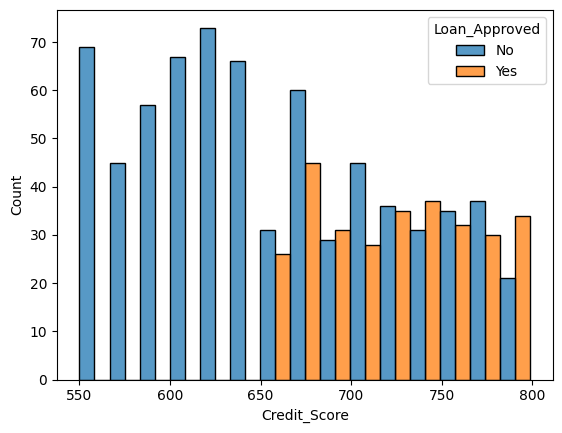

In [12]:
# Credit score with Loan Approved 

sns.histplot(
    data = df, 
    x = 'Credit_Score', 
    hue = 'Loan_Approved', 
    bins = 15, 
    multiple='dodge'
) 

<Axes: xlabel='Applicant_Income', ylabel='Count'>

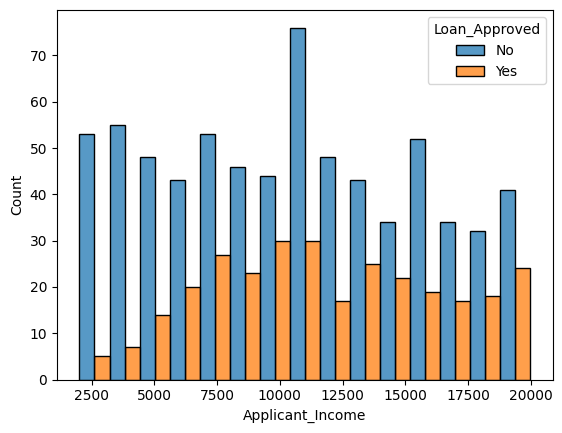

In [13]:
# Applicant Income with count 
sns.histplot(
    data = df, 
    x = 'Applicant_Income', 
    hue = 'Loan_Approved', 
    bins = 15, 
    multiple='dodge'
) 

# Remove unwanted Column (Not affect the data)

In [14]:
df = df.drop(columns=['Applicant_ID'])

# Encoding

In [15]:
df.head() 

,Applicant_Income,Coapplicant_Income,Employment_Status,Age,Marital_Status,Dependents,Credit_Score,Existing_Loans,DTI_Ratio,Savings,Collateral_Value,Loan_Amount,Loan_Term,Loan_Purpose,Property_Area,Education_Level,Gender,Employer_Category,Loan_Approved
0,17795.0,1387.0,Salaried,51.0,Married,0.0,637.0,4.0,0.53,19403.0,45638.0,16619.0,84.0,Personal,Urban,Not Graduate,Female,Private,No
1,2860.0,2679.0,Salaried,46.0,Married,3.0,621.0,2.0,0.30,2580.0,49272.0,38687.0,48.0,Car,Semiurban,Graduate,Male,Private,No
2,7390.0,2106.0,Salaried,25.0,Single,2.0,674.0,4.0,0.20,13844.0,6908.0,27943.0,72.0,Business,Urban,Graduate,Female,Government,Yes
3,13964.0,8173.0,Salaried,40.0,Married,2.0,579.0,3.0,0.31,9553.0,10844.0,27819.0,60.0,Business,Rural,Graduate,Female,Government,No
4,13284.0,4223.0,Self-employed,31.0,Single,2.0,721.0,1.0,0.29,9386.0,37629.0,12741.0,72.0,Car,Urban,Graduate,Male,Private,Yes


In [16]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Applicant_Income    1000 non-null   float64
 1   Coapplicant_Income  1000 non-null   float64
 2   Employment_Status   1000 non-null   object 
 3   Age                 1000 non-null   float64
 4   Marital_Status      1000 non-null   object 
 5   Dependents          1000 non-null   float64
 6   Credit_Score        1000 non-null   float64
 7   Existing_Loans      1000 non-null   float64
 8   DTI_Ratio           1000 non-null   float64
 9   Savings             1000 non-null   float64
 10  Collateral_Value    1000 non-null   float64
 11  Loan_Amount         1000 non-null   float64
 12  Loan_Term           1000 non-null   float64
 13  Loan_Purpose        1000 non-null   object 
 14  Property_Area       1000 non-null   object 
 15  Education_Level     1000 non-null   object 
 16  Gender 

In [17]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

le = LabelEncoder() 
df['Education_Level'] = le.fit_transform(df['Education_Level'])
df['Loan_Approved'] = le.fit_transform(df['Loan_Approved'])

In [18]:
cols = ['Employment_Status', 'Marital_Status', 'Loan_Purpose', 'Property_Area', 'Gender', 'Employer_Category']

ohe = OneHotEncoder(drop = 'first', sparse_output = False, handle_unknown = 'ignore')

Encoded= ohe.fit_transform(df[cols]) 

Encoded_df = pd.DataFrame(Encoded, columns=ohe.get_feature_names_out(cols), index = df.index )

In [19]:
df = pd.concat([df.drop(columns=cols), Encoded_df], axis = 1)

In [20]:
df.head() 
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 28 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Applicant_Income                 1000 non-null   float64
 1   Coapplicant_Income               1000 non-null   float64
 2   Age                              1000 non-null   float64
 3   Dependents                       1000 non-null   float64
 4   Credit_Score                     1000 non-null   float64
 5   Existing_Loans                   1000 non-null   float64
 6   DTI_Ratio                        1000 non-null   float64
 7   Savings                          1000 non-null   float64
 8   Collateral_Value                 1000 non-null   float64
 9   Loan_Amount                      1000 non-null   float64
 10  Loan_Term                        1000 non-null   float64
 11  Education_Level                  1000 non-null   int64  
 12  Loan_Approved        

# Correlation Heatmap

## To check the relation between two numerical values / two features

<Axes: >

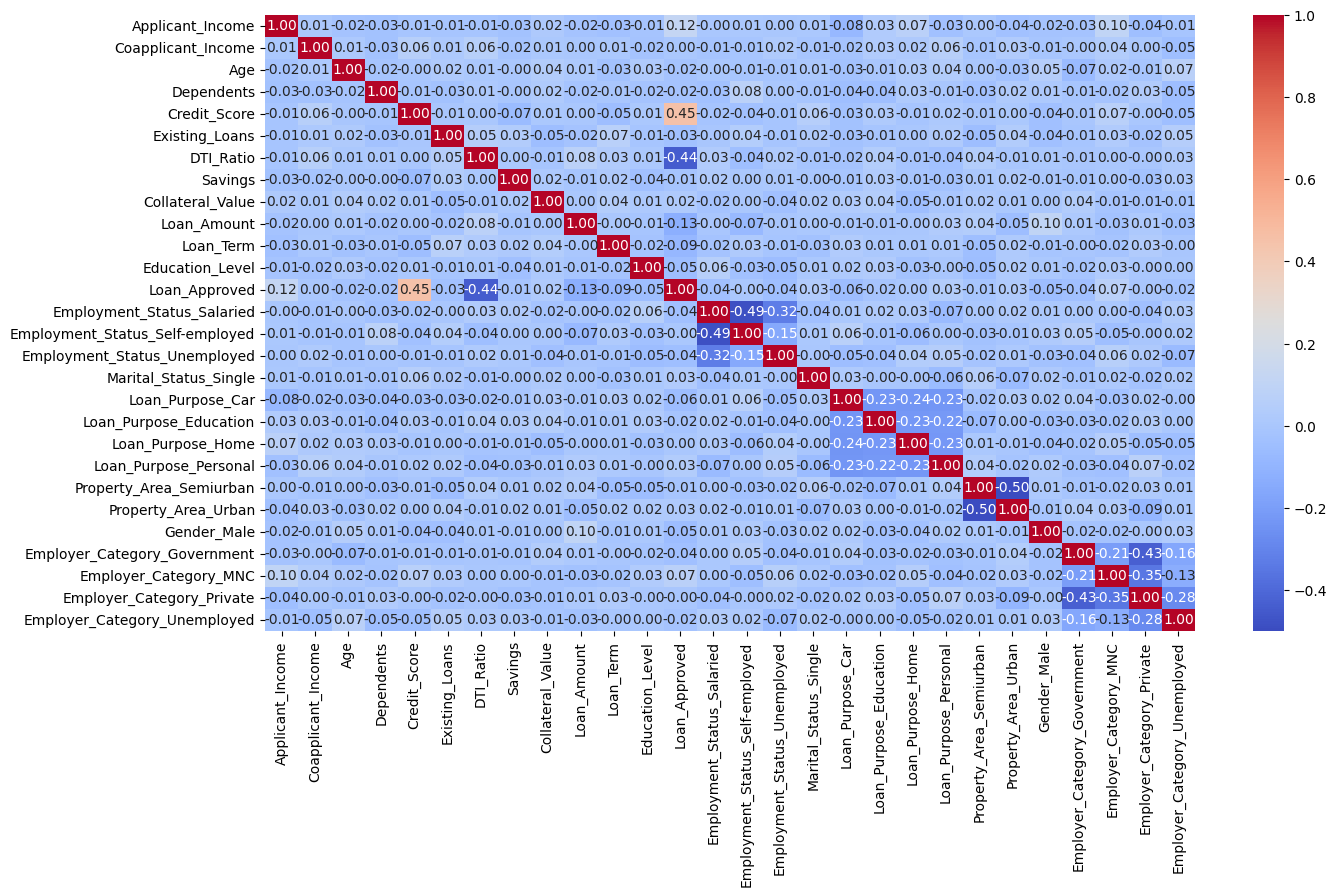

In [21]:
num_cols = df.select_dtypes(include='number') 

corr_matrix = num_cols.corr()  


plt.figure(figsize=(15, 8))
sns.heatmap(
    data = corr_matrix, 
    annot = True,
    fmt = ".2f", 
    cmap ='coolwarm'
)

# Train-Test-Split + Feature Scalling

In [22]:
X = df.drop(columns=['Loan_Approved'])
y = df['Loan_Approved']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.2, random_state = 42
)

In [25]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() 

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train and Evaluate Model 

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

log_model = LogisticRegression()
log_model.fit(X_train_scaled, y_train)

y_pred = log_model.predict(X_test_scaled)

print('Logistic Regression model')
print('Precision score = ', precision_score(y_test, y_pred))
print('Recall Score = ', recall_score(y_test, y_pred))
print('f1 score = ', f1_score(y_test, y_pred)) 
print('Accuracy score = ', accuracy_score(y_test, y_pred))
print('Confusion Matrix = ', confusion_matrix(y_test, y_pred)) 

Logistic Regression model
Precision score =  0.7833333333333333
Recall Score =  0.7704918032786885
f1 score =  0.7768595041322314
Accuracy score =  0.865
Confusion Matrix =  [[126  13]
 [ 14  47]]


In [34]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)

y_pred = knn_model.predict(X_test_scaled)

print('Knn regression')
print('Precision score = ', precision_score(y_test, y_pred))
print('Recall Score = ', recall_score(y_test, y_pred))
print('f1 score = ', f1_score(y_test, y_pred)) 
print('Accuracy score = ', accuracy_score(y_test, y_pred))
print('Confusion Matrix = ', confusion_matrix(y_test, y_pred)) 

Knn regression
Precision score =  0.6274509803921569
Recall Score =  0.5245901639344263
f1 score =  0.5714285714285714
Accuracy score =  0.76
Confusion Matrix =  [[120  19]
 [ 29  32]]


In [30]:
from sklearn.naive_bayes import GaussianNB

gb_model = GaussianNB()
gb_model.fit(X_train_scaled, y_train)

y_pred = gb_model.predict(X_test_scaled)

print('Naive bayes')
print('Precision score = ', precision_score(y_test, y_pred))
print('Recall Score = ', recall_score(y_test, y_pred))
print('f1 score = ', f1_score(y_test, y_pred)) 
print('Accuracy score = ', accuracy_score(y_test, y_pred))
print('Confusion Matrix = ', confusion_matrix(y_test, y_pred)) 

Knn regression
Precision score =  0.8035714285714286
Recall Score =  0.7377049180327869
f1 score =  0.7692307692307693
Accuracy score =  0.865
Confusion Matrix =  [[128  11]
 [ 16  45]]
